In [ ]:
import random, os
import time
import requests
import pandas as pd
import numpy as np
from IPython.display import Image, display

# TODO: CHANGE ME!!
endpoint = "https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/XXXXXXXXXX/image?iterationId=XXXXXXXXXX"
key = 'XXXXXXXXXX'


# Part I
Test one random image.

## 1.1 get random image path and show

002_0083.jpg
smalltestset/002.khaomokkhai/002_0083.jpg


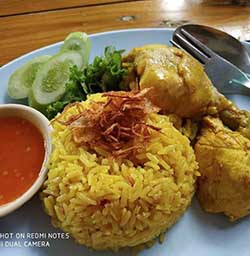

In [18]:
#dir_path = os.getcwd()
dir_path = 'smalltestset/002.khaomokkhai/'

random_filename = random.choice([
    x for x in os.listdir(dir_path)
    if os.path.isfile(os.path.join(dir_path, x)) and os.path.splitext(x)[1]=='.jpg'
])

print(random_filename)
filepath = os.path.join(dir_path, random_filename)
print(filepath)

Image(filename=filepath) 

[How to display a random picture from a folder (Python)](https://stackoverflow.com/questions/26467804/how-to-display-a-random-picture-from-a-folder-python)


[How can I display an image from a file in Jupyter Notebook?](https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook?noredirect=1&lq=1)

In [3]:
data = open(filepath, 'rb').read()
start_time_req = time.time()
resp = requests.post(endpoint,
                     data=data,
                     headers={'Content-Type': 'application/octet-stream', 'Prediction-Key': key})

In [4]:
import json
#print(json.dumps(json.loads(resp.content),indent=4, sort_keys=True))
print(json.dumps(resp.json(),indent=4, sort_keys=True))

{
    "created": "2018-08-04T14:44:04.7203764Z",
    "id": "50d1310f-0368-4a48-b577-fef33c4806d2",
    "iteration": "ab471138-6c4b-4ff6-8954-a657cda2c343",
    "predictions": [
        {
            "probability": 0.991927147,
            "tagId": "cb4bfeb7-2afe-4feb-b04d-0eb335e42baf",
            "tagName": "002.khaomokkhai"
        },
        {
            "probability": 0.340564638,
            "tagId": "595dc14e-2eaf-4f77-ac01-ab7e4b060e8b",
            "tagName": "005.khaomunkai"
        },
        {
            "probability": 0.127307147,
            "tagId": "1b2c75b5-238d-4178-8294-97b5d5c201ee",
            "tagName": "006.khaokrapraomoo"
        },
        {
            "probability": 0.06992002,
            "tagId": "6af4b0a4-ff08-4529-917a-a58d968522f3",
            "tagName": "004.padthai"
        },
        {
            "probability": 0.02798938,
            "tagId": "00c68f22-1d16-4d51-9bef-e99b8daa23d7",
            "tagName": "003.khaokhamoo"
        },
        {
   

[How to prettyprint a JSON file?](https://stackoverflow.com/questions/12943819/how-to-prettyprint-a-json-file)

# Part II
Test all images in test set.

## 2.1

In [5]:
# http://scikit-learn.org/stable/modules/model_evaluation.html
# PRECISION: What percent of positive predictions were correct? PR=TP/Total Predicted positive
# RECALL: What percent of the positive cases did you catch?? R=TP/Total
# Real Positive

from sklearn import metrics
import requests
import os
import base64
import pandas as pd
import sys

import numpy as np
import matplotlib.pyplot as plt
import itertools
import time

from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '%.2f' % float(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
MAX_Iterations = 200000


print("Reading input csv with images paths and labels")
filePath = 'images.csv'
print("file: {0}".format(filePath))
df = pd.read_csv(filePath)

y_true = []
y_pred = []

start_time = time.time()
for index, row in df.iterrows():
    if index > MAX_Iterations:
        break
    if index % 10 == 0:
        elapsed_time = time.time() - start_time
        print("processing interation {0}, elapsed time {1}".format(
            index, elapsed_time))
    path = row[0]
    label = row[1]
    resp = None
    try:
        data = open(path, 'rb').read()
        start_time_req = time.time()
        resp = requests.post(endpoint,
                             data=data,
                             headers={'Content-Type': 'application/octet-stream', 'Prediction-Key': key})
        elapsed_time_req = time.time() - start_time
        if index % 10 == 0:
            print("elapsed time  for req # {0} is {1}".format(
                index, elapsed_time_req))
    except Exception as e:
        print("Error opening file or sending request")
        print(e.__doc__)
        print(e.message)
    if resp != None and resp.status_code == requests.codes.ok:
        jsonResponse = resp.json()
        try:
            predictedClass = jsonResponse["predictions"][0]["tagName"]
            predictedProb = jsonResponse["predictions"][0]["probability"]
            y_true.append(label)
            y_pred.append(predictedClass)
        except Exception as e:
            print("Error parsing json response")
            print(e.__doc__)
            print(e.message)
    else:
        print("Got status code {0} for image '{1}' label {2}".format(
            resp.status_code, path, label))

print(metrics.classification_report(y_true, y_pred))

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

Reading input csv with images paths and labels
file: images.csv
processing interation 0, elapsed time 0.0007290840148925781
elapsed time  for req # 0 is 2.71144700050354
processing interation 10, elapsed time 48.6798779964447
elapsed time  for req # 10 is 51.53904104232788
processing interation 20, elapsed time 78.12213492393494
elapsed time  for req # 20 is 83.99636220932007
processing interation 30, elapsed time 113.99292302131653
elapsed time  for req # 30 is 118.32905006408691
processing interation 40, elapsed time 147.82101607322693
elapsed time  for req # 40 is 150.0808069705963
processing interation 50, elapsed time 186.771977186203
elapsed time  for req # 50 is 189.48408794403076
processing interation 60, elapsed time 216.04282903671265
elapsed time  for req # 60 is 218.08635783195496
processing interation 70, elapsed time 241.80596494674683
elapsed time  for req # 70 is 243.980042219162
processing interation 80, elapsed time 272.7306761741638
elapsed time  for req # 80 is 274.

Confusion matrix, without normalization
[[30  0  0  0  0  0]
 [ 0 26  0  1  0  0]
 [ 0  0 28  0  0  0]
 [ 0  0  0 26  0  0]
 [ 0  1  0  0 27  0]
 [ 0  0  0  0  0 28]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.  ]
 [0.   0.96 0.   0.04 0.   0.  ]
 [0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.  ]
 [0.   0.04 0.   0.   0.96 0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


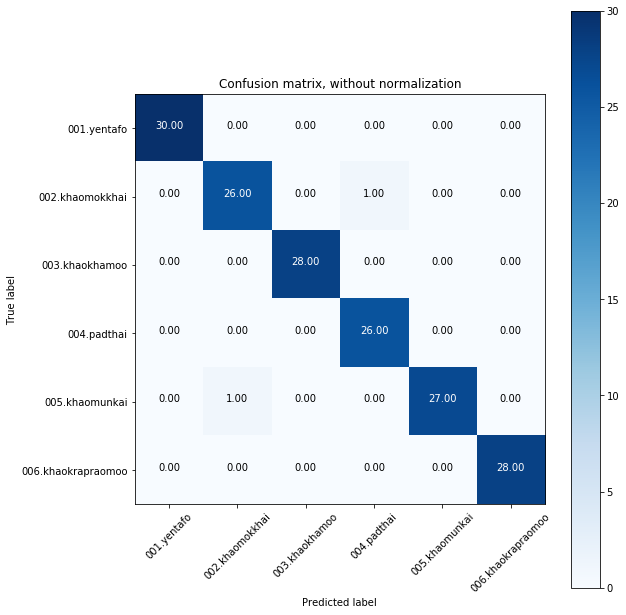

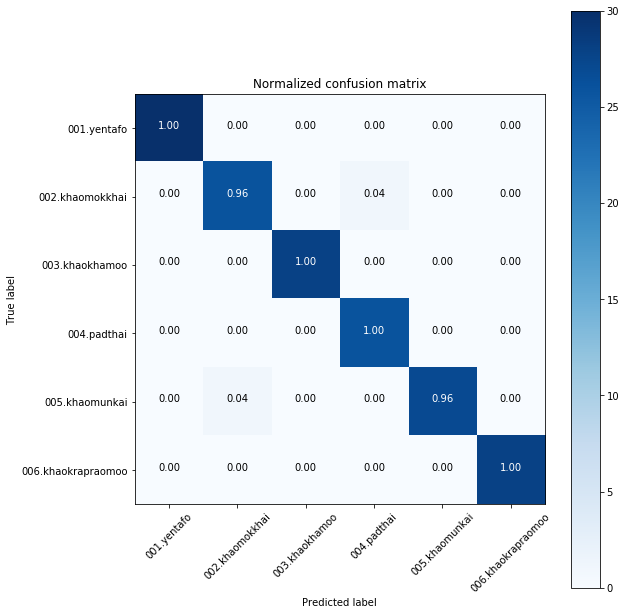

In [7]:
%matplotlib inline
# Plot non-normalized confusion matrix
plt.figure(figsize=(9,9))
class_names = sorted(set(y_true))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [59]:
df2 = df.copy()
df2.loc[:,'predicted'] = pd.Series(y_pred, index=df.index)
df2.loc[:,'correct'] = pd.Series([x==y for (x,y) in zip(y_true, y_pred)], index=df.index)

df2.head(20)
#df.to_csv('output.csv', index=False, header=None)

,image,label,predicted,correct
0,smalltestset/001.yentafo/001_0003.jpg,001.yentafo,001.yentafo,True
1,smalltestset/001.yentafo/001_0008.jpg,001.yentafo,001.yentafo,True
2,smalltestset/001.yentafo/001_0009.jpg,001.yentafo,001.yentafo,True
3,smalltestset/001.yentafo/001_0011.jpg,001.yentafo,001.yentafo,True
4,smalltestset/001.yentafo/001_0014.jpg,001.yentafo,001.yentafo,True
5,smalltestset/001.yentafo/001_0017.jpg,001.yentafo,001.yentafo,True
6,smalltestset/001.yentafo/001_0023.jpg,001.yentafo,001.yentafo,True
7,smalltestset/001.yentafo/001_0025.jpg,001.yentafo,001.yentafo,True
8,smalltestset/001.yentafo/001_0027.jpg,001.yentafo,001.yentafo,True
9,smalltestset/001.yentafo/001_0031.jpg,001.yentafo,001.yentafo,True


## 2.2 Error checking

In [60]:
df3 = df2.loc[df2['correct']==False]
df3

,image,label,predicted,correct
45,smalltestset/002.khaomokkhai/002_0052.jpg,002.khaomokkhai,004.padthai,False
137,smalltestset/005.khaomunkai/005_0106.jpg,005.khaomunkai,002.khaomokkhai,False


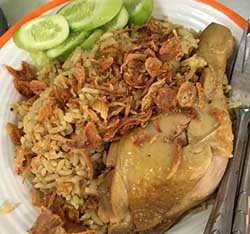

label: 002.khaomokkhai, predicted: 004.padthai


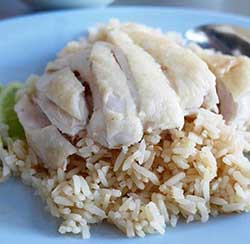

label: 005.khaomunkai, predicted: 002.khaomokkhai


In [61]:
for index, row in df3.iterrows():
    display(Image(filename=row['image']))
    print('label: {}, predicted: {}'.format(row['label'], row['predicted']))

[How to iterate over rows in a DataFrame in Pandas?](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas)